In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Getting data from ex1data1.txt
data = np.genfromtxt('ex1data1.txt',delimiter = ',')
np.shape(data)

(97, 2)

In [3]:
X = data[:,0]
X.shape = (-1,1)
y = data[:,1]
y.shape = (-1,1)
m = len(y)
X.shape,y.shape

((97, 1), (97, 1))

In [4]:
# Adding a columns of 1's in X
X = np.hstack((np.ones((m,1)),X))
X.shape


(97, 2)

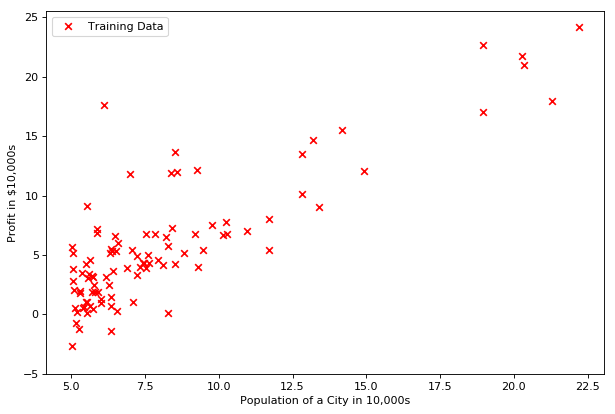

In [5]:
#Plotting a Scatter Plot of the Training Data
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X[:,1],y,c='r',marker='x',label = "Training Data")
plt.legend(loc = 'upper left')
plt.xlabel('Population of a City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.ylim(ymin=-5)
plt.show()


In [6]:
# Intializing our parameter vector theta to zeros
theta = np.zeros((2,1))
theta

array([[ 0.],
       [ 0.]])

In [7]:
# Cost Function
def cost(X,y,theta):
    m = np.size(y)
    J = (1/(2.0*m))*np.sum(np.power((X.dot(theta)-y),2))
    return J

In [8]:
# Finding the cost with theta intialized to zeros
J = cost(X,y,theta)
J

32.072733877455676

In [9]:
# Some gradient descent settings
iterations = 1000
alpha = 0.02


In [10]:
# Gradient Descent
def gdescent(X,y,theta,alpha,iters):
    X = np.mat(X); y=np.mat(y); theta = np.mat(theta);
    m = np.size(y)
    J_hist = np.zeros(iters)
    for i in range(0,iters):
        temp = theta - (alpha/m) * (X.T * (X*theta-y))
        theta = temp
        J_hist[i]= cost(X,y,theta)
        
    return np.asarray(theta),J_hist


In [11]:
# Getting the optimum parameters using gradient descent
final_theta,cost_hist = gdescent(X,y,theta
                                        ,alpha,iterations)
final_theta

array([[-3.78841926],
       [ 1.18224801]])

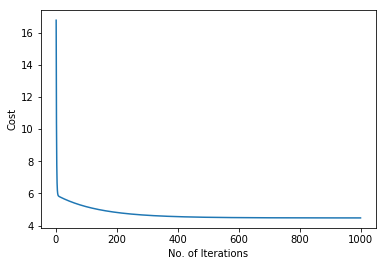

In [12]:
# Checking whether gradient descent has converged
plt.plot(np.arange(1,iterations+1),cost_hist)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

In [13]:
# Cost at optimum theta
J_final = cost(X,y,final_theta)
J_final

4.4780207433211263

In [14]:
# Prediction value at (X_max +1) and (X_min -0.5) 
val1 = np.array([1,X[:,1].max() +1]).dot(final_theta)
val2 = np.array([1,X[:,1].min() -0.5]).dot(final_theta)

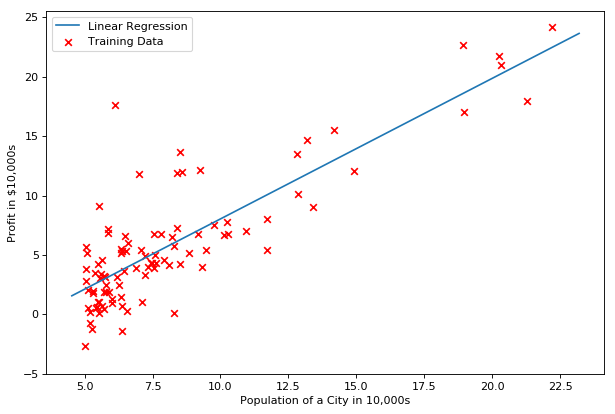

In [15]:
# Plotting the linear regression curve on the scatter plot
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X[:,1],y,c='r',marker='x',label = "Training Data")
plt.xlabel('Population of a City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.ylim(ymin=-5)
plt.plot([X[:,1].max() +1 ,X[:,1].min() -0.5],[val1,val2],label = "Linear Regression")
plt.legend(loc = 'upper left')
plt.show()

In [16]:
# Intialising the grid over which to call the Cost Function
# Used for plotting surface and contour plots 
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
xx, yy = np.meshgrid(theta0_vals,theta1_vals,indexing='ij')
J_vals = np.zeros((theta0_vals.size,theta1_vals.size))

for (i,j),v in np.ndenumerate(J_vals):
    t = np.array([[xx[i,j]],[yy[i,j]]])
    J_vals[i,j] = cost(X,y,t)


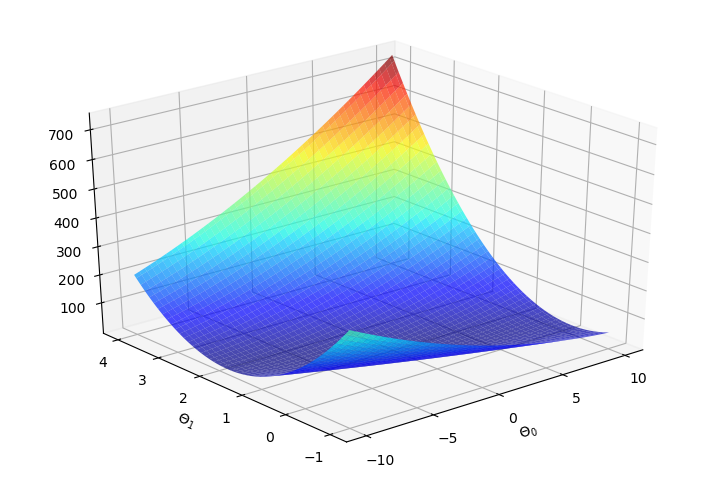

In [17]:
# 3-D Surface plot of the Cost Function 
fig = plt.figure(figsize=(9,6),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,J_vals,alpha =0.7,cmap=cm.jet)
ax.view_init(azim=230)
ax.xaxis.set_ticks(np.arange(theta0_vals.min(),theta0_vals.max()+1,5))

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.show()

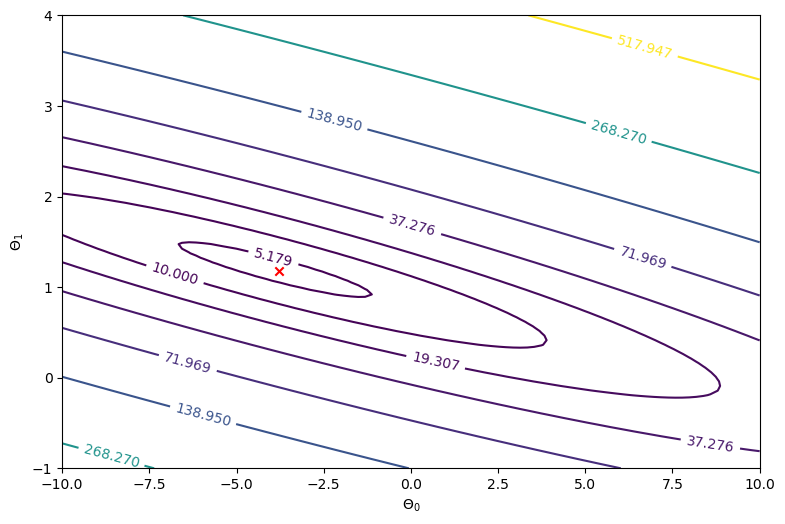

In [18]:
# Contour Plot of the Cost Function showing the minimum with a red cross
fig = plt.figure(figsize=(9,6),dpi=100)
CS = plt.contour(xx,yy,J_vals,np.logspace(-1,3,15))
plt.clabel(CS, inline=1, fontsize=10)
plt.scatter(final_theta[0],final_theta[1],marker = 'x',c = 'r')
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.show()

In [19]:
# Prediction of profits in areas with 35,000 and 70,000 people
predict1 = np.array([1,3.5]).dot(final_theta)
predict2 = np.array([1,7]).dot(final_theta)
print "Profit prediction in an area with 35,000 people: \n$", round(predict1*10000,2)
print "Profit prediction in an area with 70,000 people: \n$", round(predict2*10000,2)

Profit prediction in an area with 35,000 people: 
$ 3494.49
Profit prediction in an area with 70,000 people: 
$ 44873.17
